In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import sklearn.decomposition
import matplotlib.pyplot as plt

## Problem 1

In [3]:
def cos_sim(x, y):
    return np.dot(x, y) / np.linalg.norm(x) / np.linalg.norm(y)

### 1.1

In [29]:
from sanger import SangerNet

In [30]:
classes = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}

In [31]:
# Load data
iris_df = pd.read_csv("Iris.txt").sample(frac=1)  # with shuffling!
iris_lab = np.array([classes[x] for x in iris_df.to_numpy()[:, 4]])
iris_np = iris_df.to_numpy()[:, :4].T.astype(np.float32)
iris_np_no_std = iris_np.copy()

# Standardize
iris_np -= iris_np.mean(axis=1)[:, None]
iris_np /= iris_np.std(axis=1)[:, None]

In [32]:
snet = SangerNet()
snet.learn(iris_np)

print("\nPCs:")
print(snet.w)

Iteration 0: delta norm 0.0625279064583339
Iteration 1000: delta norm 0.0006266084544161774
Iteration 2000: delta norm 8.429923772667203e-05
Iteration 3000: delta norm 5.933042538640575e-05
Iteration 4000: delta norm 6.4423539275241e-05
Iteration 5000: delta norm 6.014108613486897e-05
Iteration 6000: delta norm 4.997488924239381e-05
Iteration 7000: delta norm 3.781814539881754e-05
Iteration 8000: delta norm 2.6614906518949336e-05
Iteration 9000: delta norm 1.7770938642051056e-05
Iteration 10000: delta norm 1.1460162042656408e-05
Iteration 11000: delta norm 7.246970452055244e-06
Iteration 12000: delta norm 4.552238866393405e-06
Iteration 13000: delta norm 2.8724935556234705e-06
Iteration 14000: delta norm 1.8379913541539027e-06

PCs:
[[-0.52175174  0.26573413 -0.58099809 -0.56533328]
 [-0.37477846 -0.92452554 -0.02262252 -0.06543579]
 [-0.72007447  0.24355875  0.14084776  0.63429788]
 [-0.2627642   0.12622197  0.80005431 -0.52163266]]


### 1.2

Oja's rule only finds one principal component (explaning maximum variance)

### 1.3

Text(0, 0.5, 'Variance explained')

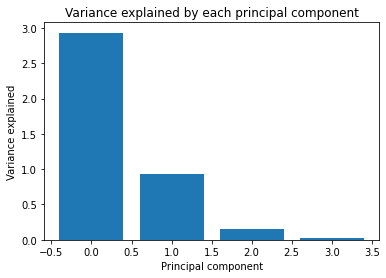

In [33]:
# Plot variances v.s. principal component
pca = sklearn.decomposition.PCA(n_components=4)
pca.fit(iris_np.T)
pc, var = pca.components_, pca.explained_variance_
plt.bar([i for i in range(4)], pca.explained_variance_)
plt.title("Variance explained by each principal component")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")

### 1.4

In [34]:
# Check non-standardization
print(iris_np_no_std.mean(1), iris_np_no_std.var(1))

# Run Sanger's Rule without standardization
snet_no_std = SangerNet()
snet_no_std.learn(iris_np_no_std)

print("\nPCs:")
print(snet.w)

[5.8483224 3.0543625 3.773826  1.2060403] [0.6819602  0.18865547 3.078711   0.5742588 ]
Iteration 0: delta norm 0.7271088466069876
Iteration 1000: delta norm 0.00023316458107446264
Iteration 2000: delta norm 0.00044021443159495587
Iteration 3000: delta norm 0.00021673169968585283
Iteration 4000: delta norm 0.00024345940910386302
Iteration 5000: delta norm 0.00045150205084659663
Iteration 6000: delta norm 0.00028983506866011715
Iteration 7000: delta norm 0.0001372601858021078
Iteration 8000: delta norm 7.533053585418174e-05
Iteration 9000: delta norm 4.749629540785268e-05
Iteration 10000: delta norm 3.361173115226646e-05
Iteration 11000: delta norm 2.6588829985641884e-05
Iteration 12000: delta norm 2.4100610249439312e-05
Iteration 13000: delta norm 2.5530124444548905e-05
Iteration 14000: delta norm 3.068548113106297e-05

PCs:
[[-0.52175174  0.26573413 -0.58099809 -0.56533328]
 [-0.37477846 -0.92452554 -0.02262252 -0.06543579]
 [-0.72007447  0.24355875  0.14084776  0.63429788]
 [-0.26276

Still works just the same!

### 1.5

In [35]:
pca = sklearn.decomposition.PCA(n_components=4)
pca.fit(iris_np.T)
pc, var = pca.components_, pca.explained_variance_

In [36]:
# Checking that Sanger's agrees
[cos_sim(pc[i], snet.w[i]) for i in range(4)]

[-1.0000000791603756,
 -1.0000000585770557,
 1.0000000253591634,
 0.9999958256211565]

### 1.6

In [37]:
# render the data using 2 PC's
pca2 = sklearn.decomposition.PCA(n_components=2)
iris_pca = pca2.fit_transform(iris_np.T).T

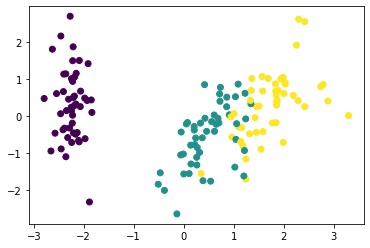

In [13]:
plt.scatter(iris_pca[0], iris_pca[1], c=iris_lab)

1. Yes, the purple class (setosa) is still linearly separable from the other two. You can tell by visualization
2. It's certainly possible for dimensionality reduction to make linearly-separable data not so; this is why things like kernels are needed to "lift" features into higher dims. Thus it's probably a good idea, if you have enough data, to run the perceptron on high dim data.

## Problem 2

In [14]:
from som import *

### 2.1

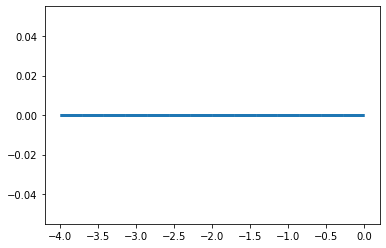

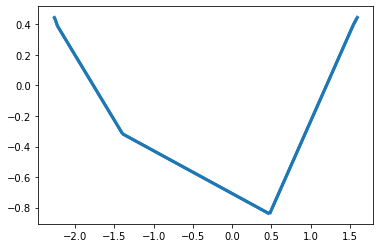

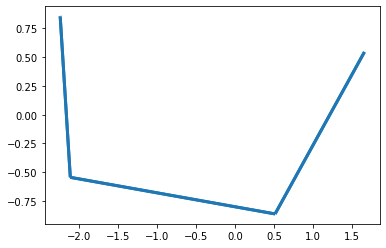

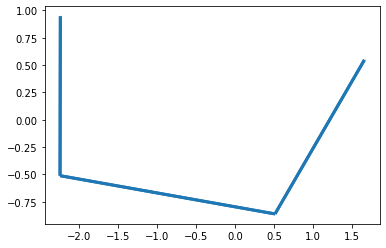

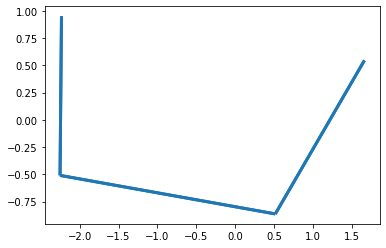

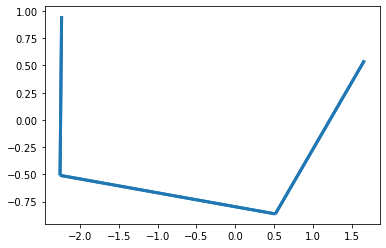

In [15]:
# Create 15-node SOM
N, M = 15, 1
som = SOM(N, M)
som.init_neigh(is_neigh_full)
som.init_G(get_1d_uniform(N))
lr_func = get_lr_func(0.001, 0.001)

# Train on PCA'ed data
max_epoch = 500
for epoch in tqdm(range(max_epoch)):
    if epoch % 100 == 0 or epoch == max_epoch - 1:
        som.render()
    for data in iris_pca.T:
        som.update(data, epoch, lr_func)

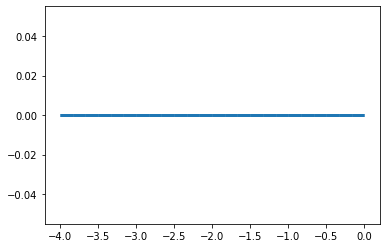

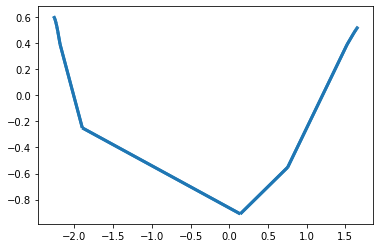

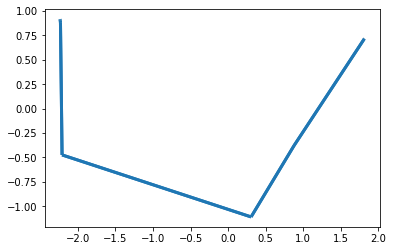

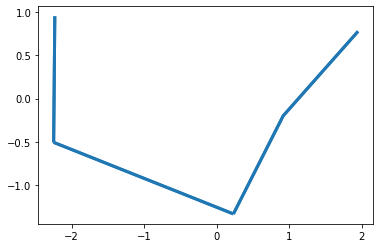

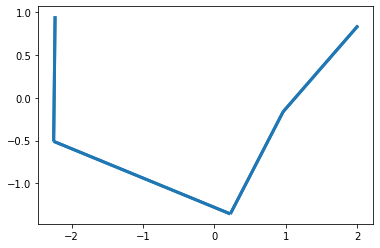

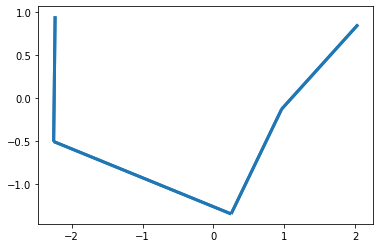

In [16]:
# Create 25-node SOM
N, M = 25, 1
som = SOM(N, M)
som.init_neigh(is_neigh_full)
som.init_G(get_1d_uniform(N))
lr_func = get_lr_func(0.001, 0.001)

# Train on PCA'ed data
max_epoch = 500
for epoch in tqdm(range(max_epoch)):
    if epoch % 100 == 0 or epoch == max_epoch - 1:
        som.render()
    for data in iris_pca.T:
        som.update(data, epoch, lr_func)

## Problem 3

### 3.1

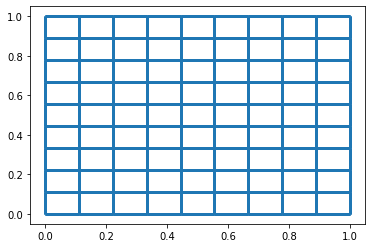

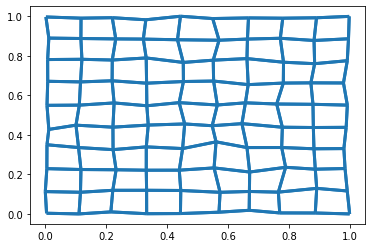

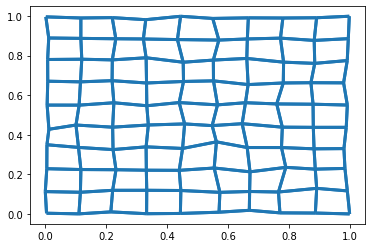

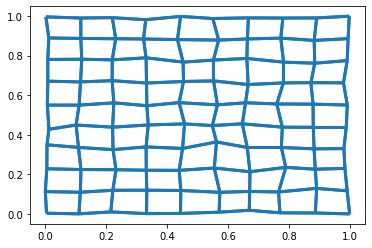

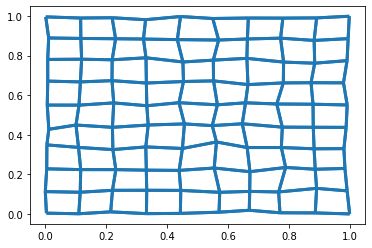

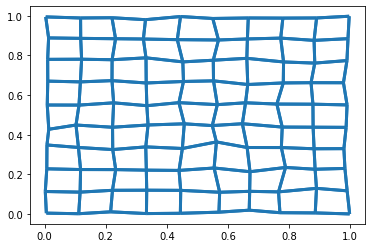

In [17]:
# Create 10x10 SOM
N, M = 10, 10
som = SOM(N, M)
som.init_neigh(is_neigh_grid)
som.init_G(get_uniform_prior(N, M))
lr_func = get_lr_func(0.1, 0.001)

# Train on random data
max_epoch = 1000
for epoch in tqdm(range(max_epoch)):
    if epoch % 200 == 0 or epoch == max_epoch - 1:
        som.render()
    som.update(np.random.uniform(size=(2,)), epoch, lr_func)